Topic:        Challenge Set 3

Subject:      Pandas Practice - Movie Data

Date:         1/22/2018

Name:         Browning Gentry


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv("2013_movies.csv")

# Challenge 1

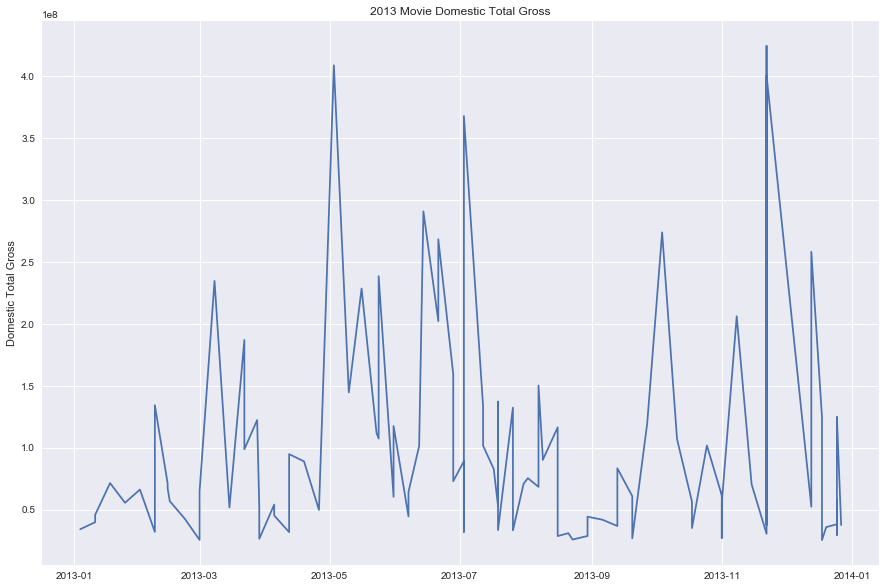

In [3]:
df['TS_ReleaseDate'] = df.apply(lambda x: datetime.strptime(x['ReleaseDate'],'%Y-%m-%d %H:%M:%S'), axis=1)
df.sort_values('TS_ReleaseDate',inplace=True)

plt.figure(figsize=(15,10))
plt.plot(df.TS_ReleaseDate, df.DomesticTotalGross)
plt.ylabel('Domestic Total Gross')
plt.title('2013 Movie Domestic Total Gross');


# Challenge 2

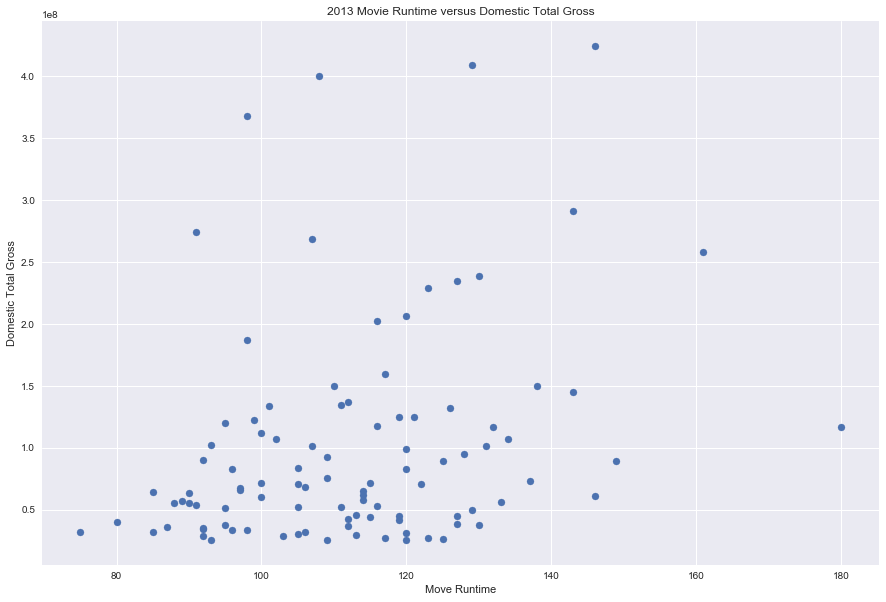

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(df.Runtime, df.DomesticTotalGross);
plt.ylabel('Domestic Total Gross')
plt.xlabel('Move Runtime')
plt.title('2013 Movie Runtime versus Domestic Total Gross');

# Challenge 3

In [5]:
df_rating = df.groupby('Rating')['Runtime','DomesticTotalGross'].mean()
df_rating

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


# Challenge 4

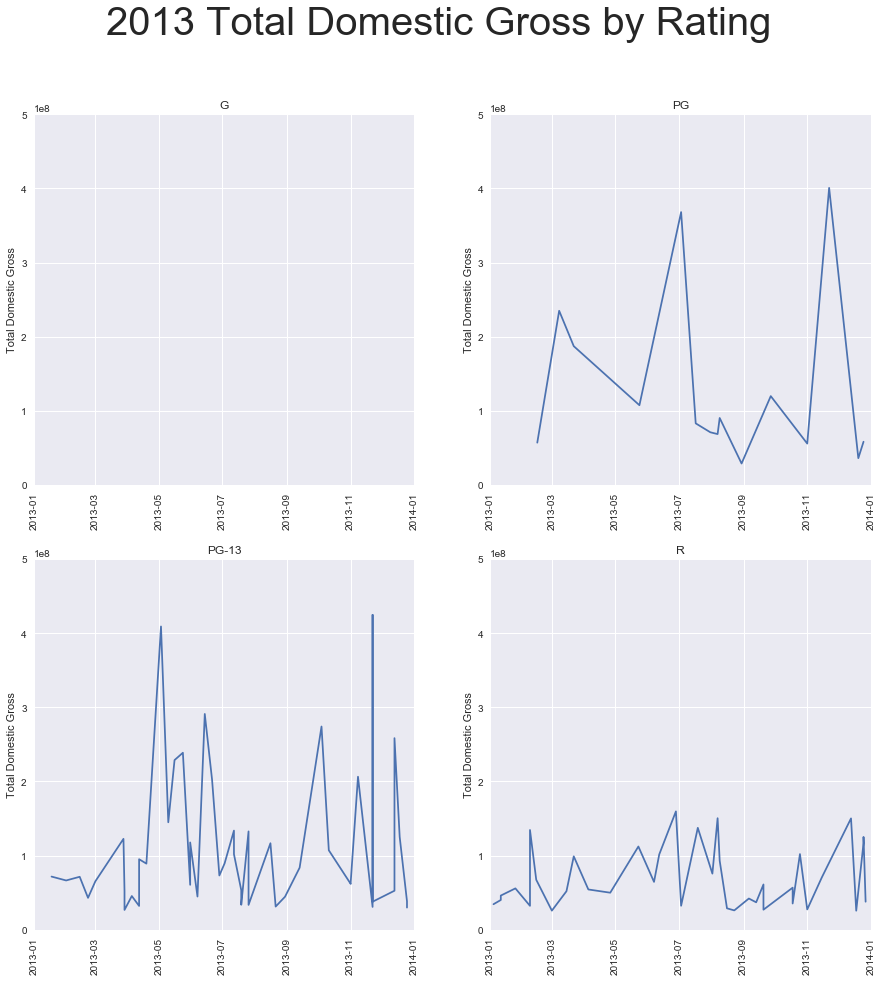

In [6]:
df_rating.reset_index(inplace=True)
col_count = 2
row_count = 2
fig, ax = plt.subplots(row_count, col_count, figsize=(15,15))
fig.suptitle('2013 Total Domestic Gross by Rating',size=40)
row = 0
col = 0
start_x = datetime.strptime('2013','%Y')
end_x = datetime.strptime('2014','%Y')
start_y = 0 
end_y = 500000000

for i, rating in enumerate(df_rating.Rating):
    ax[row, col].plot(df[df.Rating == rating].TS_ReleaseDate, df[df.Rating == rating].DomesticTotalGross)
    plt.setp(ax[row,col].xaxis.get_majorticklabels(), rotation=90)
    ax[row, col]
    ax[row, col].set_title(rating)
    ax[row, col].set_ylabel('Total Domestic Gross')
    ax[row, col].set_xlim(start_x,end_x)
    ax[row, col].set_ylim(start_y,end_y)
    if col % (col_count-1) == 0 and col != 0:
        row += 1 
        col = 0
    else:
        col += 1

# Challenge 5

In [17]:
df_director = df.groupby('Director').agg({'DomesticTotalGross':'sum','Title':'count'})
df_director['GrossPerMovie'] = df_director.apply(lambda x: x['DomesticTotalGross']/x['Title'], axis=1)
df_director.sort_values('GrossPerMovie', inplace=True, ascending=False)
df_director.reset_index(inplace=True)
df_director['Director'][0]

'Francis Lawrence'

# Challenge 6

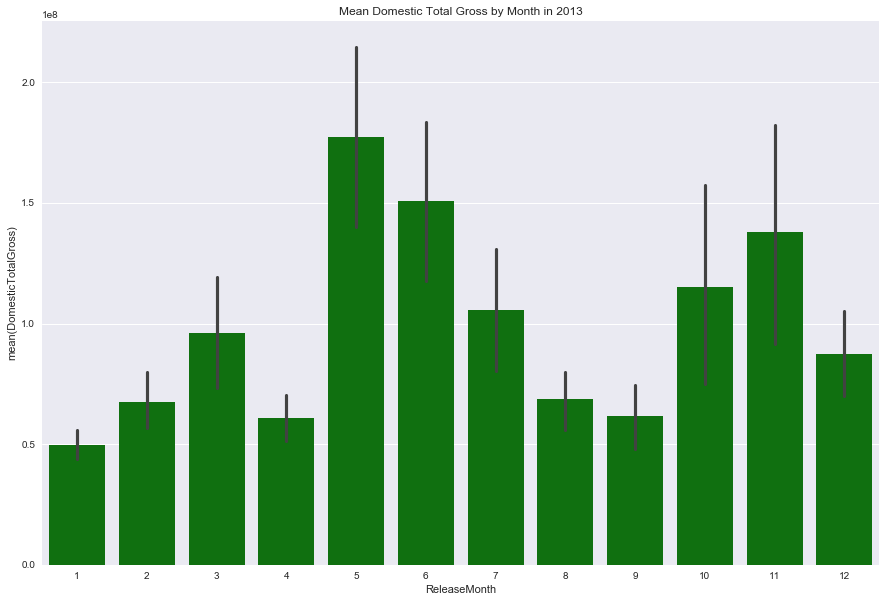

In [148]:
df['ReleaseMonth'] = df.apply(lambda x: int(datetime.strftime(x['TS_ReleaseDate'], '%m')), axis=1)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
fig = sns.barplot(df.ReleaseMonth, df.DomesticTotalGross, color='green', ci=68);
fig.set_title("Mean Domestic Total Gross by Month in 2013");
